In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,tpsa,saacc,h-050,mlogp,rdchi,nn,c-040,lc50
0,0.514570,0.411306,0.000000,0.019635,-0.955340,0.001262,0.00000,-0.455071
1,0.514570,0.411306,0.000000,0.159062,-1.066755,0.001262,0.00000,-0.093061
2,0.123412,0.107901,0.000000,1.745911,-1.568754,0.001262,0.00000,1.307301
3,0.123412,0.107901,0.000000,1.598251,-1.535789,0.001262,0.00000,1.168207
4,0.123412,0.107901,0.000000,0.954059,-0.868297,0.001262,0.00000,0.804428
5,1.000000,1.000000,0.375897,-2.248683,0.778006,0.001262,0.85619,0.847093
6,0.123412,0.107901,0.000000,0.211611,0.392174,0.001262,0.00000,1.453502
7,0.514570,0.411306,0.000000,0.530092,-0.110742,0.001262,0.00000,-0.231058
8,0.514570,0.411306,0.000000,-0.218431,0.590631,0.001262,0.00000,-0.328732
9,0.514570,0.411306,0.000000,0.225688,0.925043,0.001262,0.00000,-0.411327


In [3]:
X = dataset.drop(columns=['mlogp', 'c-040']).values
Y = dataset['lc50'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 6


first_hidden_layer_size = 16
second_hidden_layer_size = 16

output_layer_size = 1


epochs_number = 50
batch_size = 32

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 436 samples, validate on 110 samples
Epoch 1/50
436/436 [==============================] - 0s 825us/step - loss: 1.0924 - mean_absolute_error: 0.7275 - mean_squared_error: 1.0924 - val_loss: 1.2831 - val_mean_absolute_error: 0.6991 - val_mean_squared_error: 1.2831
Epoch 2/50
436/436 [==============================] - 0s 215us/step - loss: 0.7999 - mean_absolute_error: 0.6180 - mean_squared_error: 0.7999 - val_loss: 0.9634 - val_mean_absolute_error: 0.6003 - val_mean_squared_error: 0.9634
Epoch 3/50
436/436 [==============================] - 0s 246us/step - loss: 0.5800 - mean_absolute_error: 0.5190 - mean_squared_error: 0.5800 - val_loss: 0.7218 - val_mean_absolute_error: 0.5056 - val_mean_squared_error: 0.7218
Epoch 4/50
436/436 [==============================] - 0s 233us/step - loss: 0.4171 - mean_absolute_error: 0.4200 - mean_squared_error: 0.4171 - val_loss: 0.5289 - val_mean_absolute_error: 0.4139 - val_mean_squared_error: 0.5289
Epoch 5/50
436/436 [======================

Epoch 37/50
436/436 [==============================] - 0s 151us/step - loss: 0.0020 - mean_absolute_error: 0.0355 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_absolute_error: 0.0336 - val_mean_squared_error: 0.0018
Epoch 38/50
436/436 [==============================] - 0s 154us/step - loss: 0.0020 - mean_absolute_error: 0.0350 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_absolute_error: 0.0336 - val_mean_squared_error: 0.0018
Epoch 39/50
436/436 [==============================] - 0s 84us/step - loss: 0.0019 - mean_absolute_error: 0.0341 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_absolute_error: 0.0325 - val_mean_squared_error: 0.0017
Epoch 40/50
436/436 [==============================] - 0s 197us/step - loss: 0.0019 - mean_absolute_error: 0.0336 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_absolute_error: 0.0325 - val_mean_squared_error: 0.0017
Epoch 41/50
436/436 [==============================] - 0s 213us/step - loss: 0.0018 -

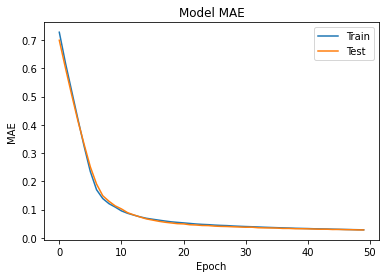

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

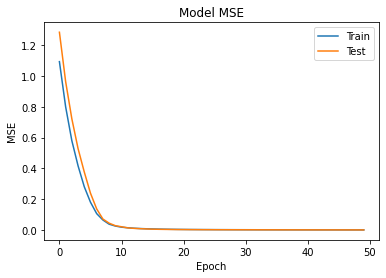

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

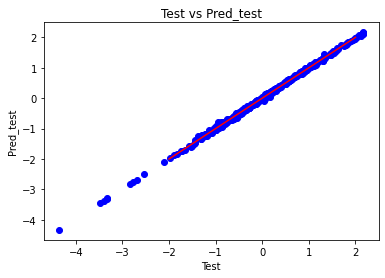

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

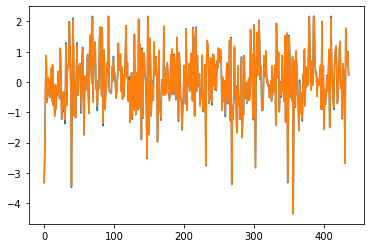

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

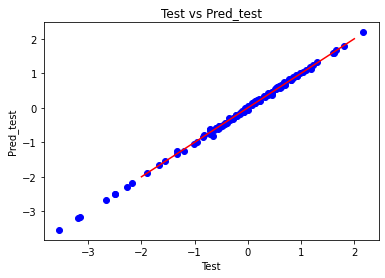

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

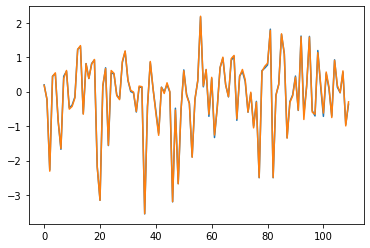

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.03654659643392393
0.0364992201456627


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9852318167686462, p = 0.00020372771541588008
Test k = 0.9737026691436768, p = 0.028272634372115135


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9862756729125977, p_s = 5.154455720912665e-05
k_n = 20.437098659707413, p_n = 3.64871895631287e-05


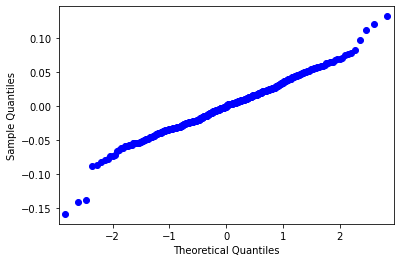

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

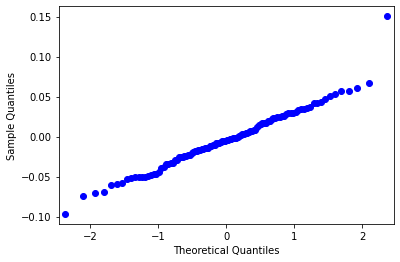

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

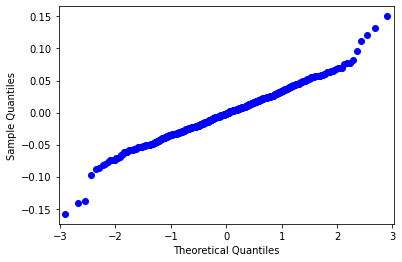

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

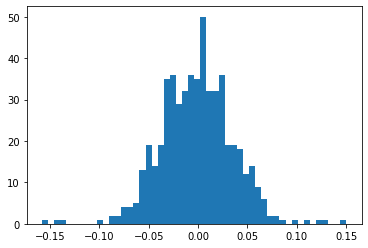

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')